# Exploratory Data Analysis
## Univariate Data Analysis

In [1]:
# libraries
import os
import sys
import inspect
sys.path.append("../src")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from shared import directories
from shared import filenames
from shared import variables

sys.path.append(directories.ANALYSIS_PATH)
import univariate
import description

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Obtain training data

In [2]:
df = pd.read_csv(os.path.join(directories.INTERIM_DATA_DIR,
                              filenames.TRAIN_FILENAME),
                 encoding="Latin-1", low_memory=False)

### Inspect Data Structure

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5361 entries, 0 to 5360
Data columns (total 53 columns):
wave                          5361 non-null int64
gender                        5361 non-null object
age                           5303 non-null float64
age_o                         5286 non-null float64
d_age                         5361 non-null int64
race                          5324 non-null object
race_o                        5305 non-null object
samerace                      5361 non-null int64
importance_same_race          5311 non-null float64
pref_o_attractive             5297 non-null float64
pref_o_sincere                5297 non-null float64
pref_o_intelligence           5297 non-null float64
pref_o_funny                  5289 non-null float64
pref_o_ambitious              5281 non-null float64
pref_o_shared_interests       5268 non-null float64
attractive_o                  5210 non-null float64
sincere_o                     5163 non-null float64
intelligence_o    

## Qualitative Variable Summary

In [4]:
description.describe_qual_df(df)

,count,unique,top,freq,missing
gender,5361,2,male,2698,0
race,5324,5,caucasian,3033,37
race_o,5305,5,caucasian,3004,56
match,5361,2,Not Matched,4455,0


## Quantitative Variable Summary

In [5]:
description.describe_quant_df(df)

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
age,5303.0,58,18.00,24.000000,26.394682,26.000000,28.000000,55.000000,-9.457377,87.441972
age_o,5286.0,75,18.00,24.000000,26.381952,26.000000,28.000000,55.000000,-8.276122,66.494188
importance_same_race,5311.0,50,0.00,1.000000,3.780644,3.000000,6.000000,10.000000,-10.209281,102.229414
pref_o_attractive,5297.0,64,0.00,15.000000,22.541193,20.000000,25.000000,100.000000,-8.987642,78.777707
pref_o_sincere,5297.0,64,0.00,15.000000,17.300470,18.370000,20.000000,60.000000,-8.987642,78.777707
pref_o_intelligence,5297.0,64,0.00,17.390000,20.246825,20.000000,23.810000,50.000000,-8.987642,78.777707
pref_o_funny,5289.0,72,0.00,15.000000,17.446366,18.000000,20.000000,50.000000,-8.454108,69.471946
pref_o_ambitious,5281.0,80,0.00,5.000000,10.767216,10.000000,15.000000,53.000000,-8.001728,62.027649
pref_o_shared_interests,5268.0,93,0.00,9.090000,11.900864,11.110000,16.000000,30.000000,-7.393431,52.662815
attractive_o,5210.0,151,0.00,5.000000,6.201228,6.000000,8.000000,10.500000,-5.703709,30.532294


## Wave

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
wave,5361.0,0,1.0,7.0,11.340235,11.0,15.0,21.0,0.0,-3.0


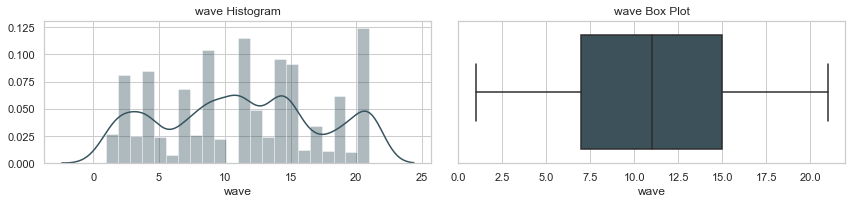

In [6]:
d, v = univariate.analysis(df[['wave']])
d

## Wave Males

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
wave_males,5361.0,0,25.0,225.0,301.888081,324.0,400.0,484.0,0.0,-3.0


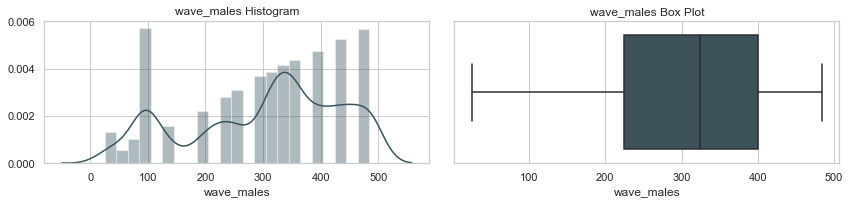

In [7]:
d, v = univariate.analysis(df[['wave_males']])
d

## Wave Females

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
wave_females,5361.0,0,25.0,225.0,301.666107,324.0,400.0,484.0,0.0,-3.0


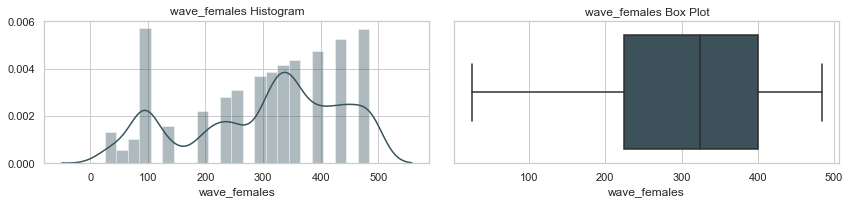

In [8]:
d, v = univariate.analysis(df[['wave_females']])
d

## Wave Size

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
wave_size,5361.0,0,50.0,450.0,603.554188,648.0,800.0,968.0,0.0,-3.0


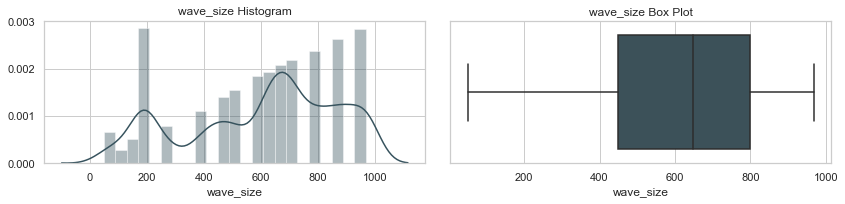

In [9]:
d, v = univariate.analysis(df[['wave_size']])
d

## Gender

,male,female,missing
gender,2698,2663,0


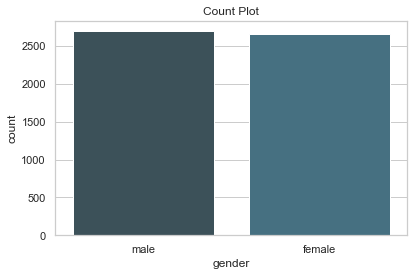

In [10]:
d, v = univariate.analysis(df[['gender']])
d

## Age
Age of self

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
age,5303.0,58,18.0,24.0,26.394682,26.0,28.0,55.0,-9.457377,87.441972


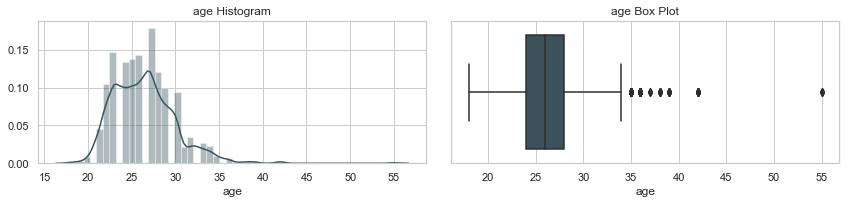

In [11]:
d, v = univariate.analysis(df[['age']])
d

## Age of Partner

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
age_o,5286.0,75,18.0,24.0,26.381952,26.0,28.0,55.0,-8.276122,66.494188


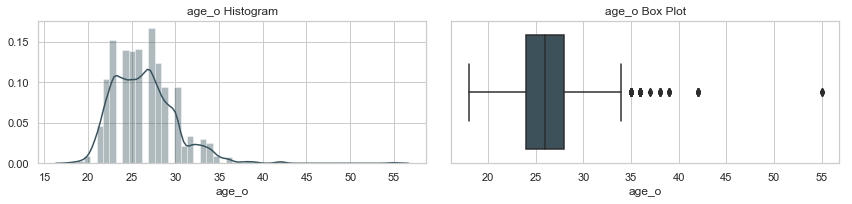

In [12]:
d, v = univariate.analysis(df[['age_o']])
d

## Difference in Age

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
d_age,5361.0,0,0.0,1.0,4.197724,3.0,5.0,37.0,0.0,-3.0


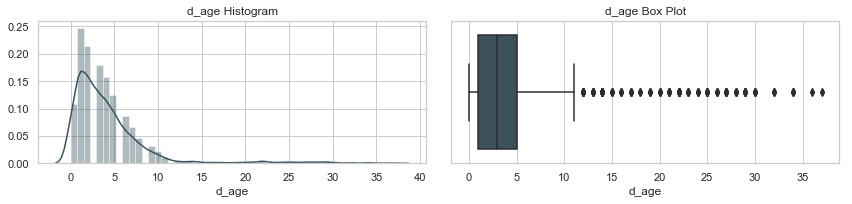

In [13]:
d, v = univariate.analysis(df[['d_age']])
d

## Race of Self

,caucasian,asian,latino,other,black,missing
race,3033,1260,429,339,263,37


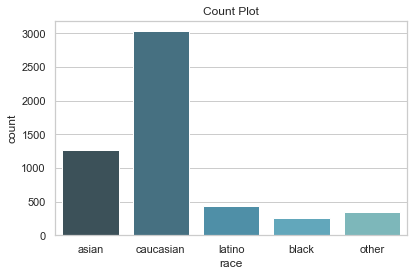

In [14]:
d, v = univariate.analysis(df[['race']])
d

## Race of Partner

,caucasian,asian,latino,other,black,missing
race_o,3004,1250,420,341,290,56


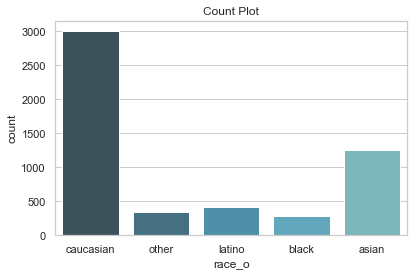

In [15]:
d, v = univariate.analysis(df[['race_o']])
d

## Same Race

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
samerace,5361.0,0,0.0,0.0,0.395449,0.0,1.0,1.0,0.0,-3.0


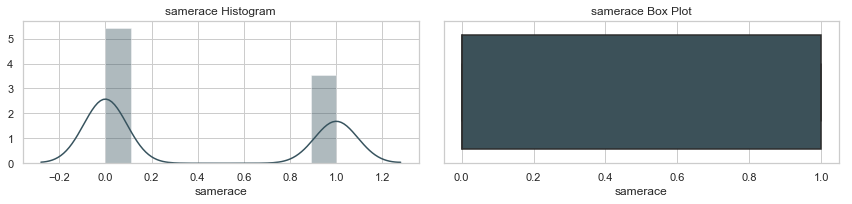

In [16]:
d, v = univariate.analysis(df[['samerace']])
d

## Importance Same Race

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
importance_same_race,5311.0,50,0.0,1.0,3.780644,3.0,6.0,10.0,-10.209281,102.229414


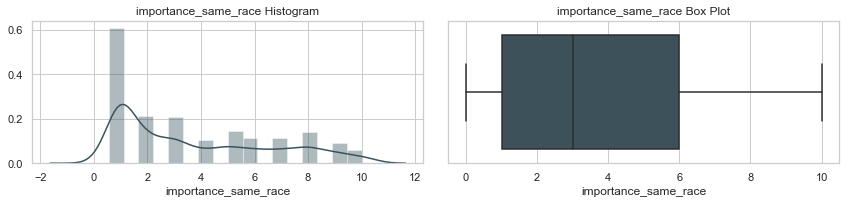

In [17]:
d, v = univariate.analysis(df[['importance_same_race']])
d

## Partner's Preference for Attractiveness

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
pref_o_attractive,5297.0,64,0.0,15.0,22.541193,20.0,25.0,100.0,-8.987642,78.777707


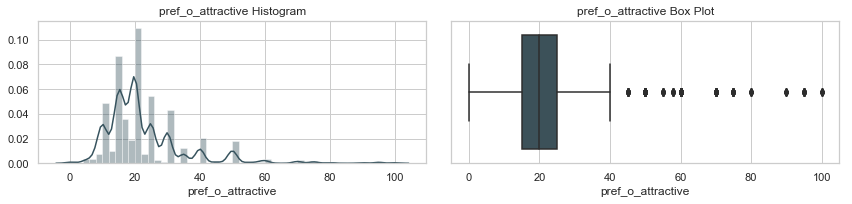

In [18]:
d, v = univariate.analysis(df[['pref_o_attractive']])
d

## Partner's Preference for Sincerity

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
pref_o_sincere,5297.0,64,0.0,15.0,17.30047,18.37,20.0,60.0,-8.987642,78.777707


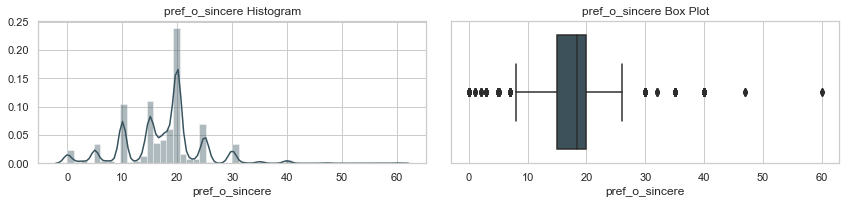

In [19]:
d, v = univariate.analysis(df[['pref_o_sincere']])
d

## Partner's Preference for Intelligence 

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
pref_o_intelligence,5297.0,64,0.0,17.39,20.246825,20.0,23.81,50.0,-8.987642,78.777707


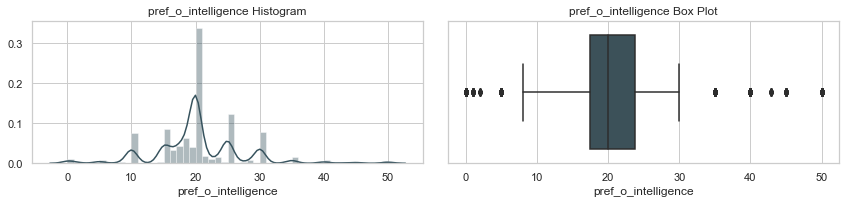

In [20]:
d, v = univariate.analysis(df[['pref_o_intelligence']])
d

## Partner's Preference for Humor

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
pref_o_funny,5289.0,72,0.0,15.0,17.446366,18.0,20.0,50.0,-8.454108,69.471946


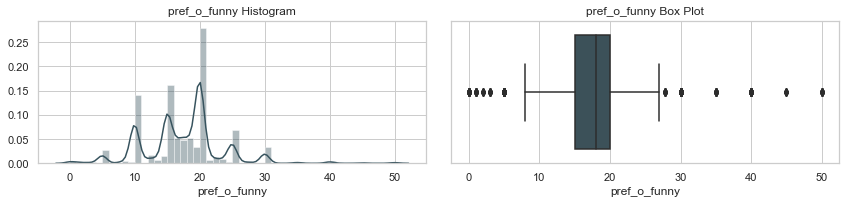

In [21]:
d, v = univariate.analysis(df[['pref_o_funny']])
d

## Partner's Preference for Ambition

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
pref_o_ambitious,5281.0,80,0.0,5.0,10.767216,10.0,15.0,53.0,-8.001728,62.027649


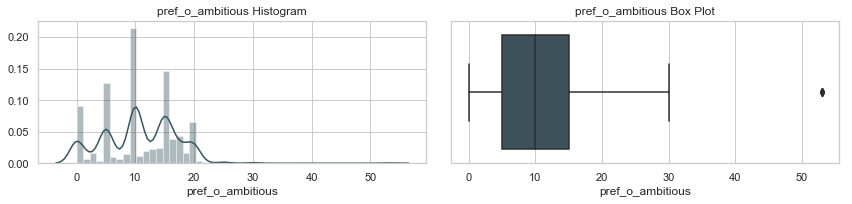

In [22]:
d, v = univariate.analysis(df[['pref_o_ambitious']])
d

## Partner's Preference for Shared Interests

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
pref_o_shared_interests,5268.0,93,0.0,9.09,11.900864,11.11,16.0,30.0,-7.393431,52.662815


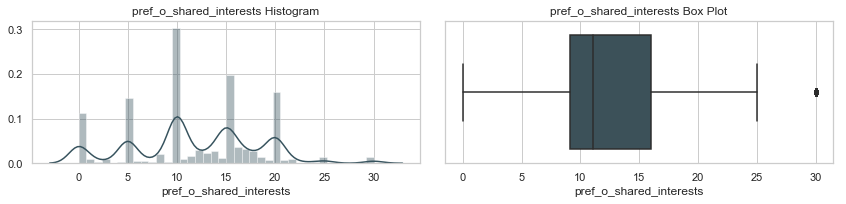

In [23]:
d, v = univariate.analysis(df[['pref_o_shared_interests']])
d

## Partner's Rating of Subject on Attractiveness

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
attractive_o,5210.0,151,0.0,5.0,6.201228,6.0,8.0,10.5,-5.703709,30.532294


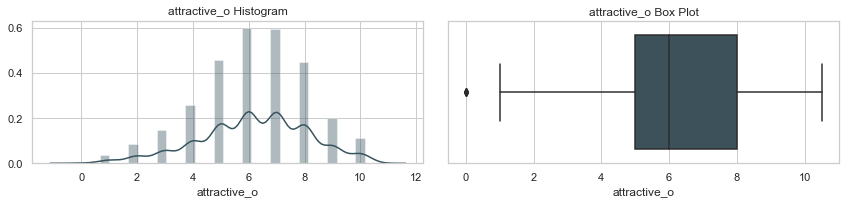

In [24]:
d, v = univariate.analysis(df[['attractive_o']])
d

## Partner's Rating of Subject on Sincerity

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
sincere_o,5163.0,198,0.0,6.0,7.172574,7.0,8.0,10.0,-4.910612,22.114107


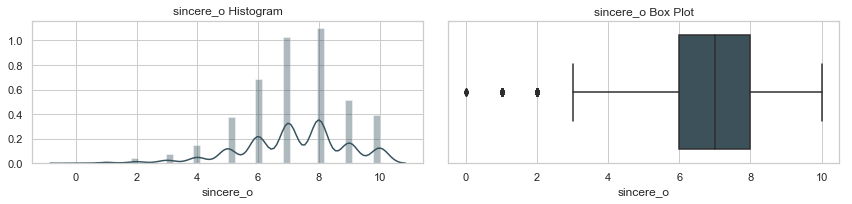

In [25]:
d, v = univariate.analysis(df[['sincere_o']])
d

## Partner's Rating of Subject on Intelligence

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
intelligence_o,5149.0,212,0.0,6.0,7.369781,7.0,8.0,10.0,-4.725347,20.328909


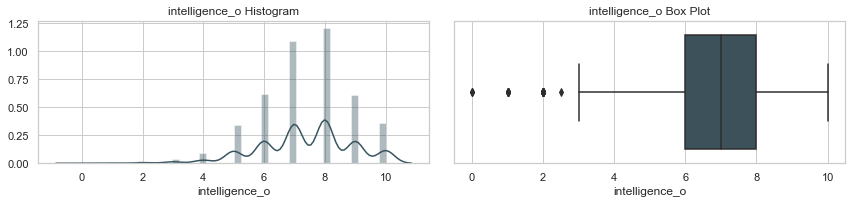

In [26]:
d, v = univariate.analysis(df[['intelligence_o']])
d

## Partner's Rating of Subject on Humor

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
funny_o,5116.0,245,0.0,5.0,6.415559,7.0,8.0,10.0,-4.350807,16.929522


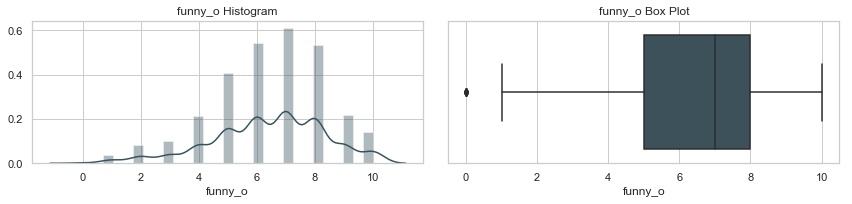

In [27]:
d, v = univariate.analysis(df[['funny_o']])
d

## Partner's Rating of Subject on Ambition

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
ambitious_o,4898.0,463,0.0,6.0,6.769702,7.0,8.0,10.0,-2.945057,6.673362


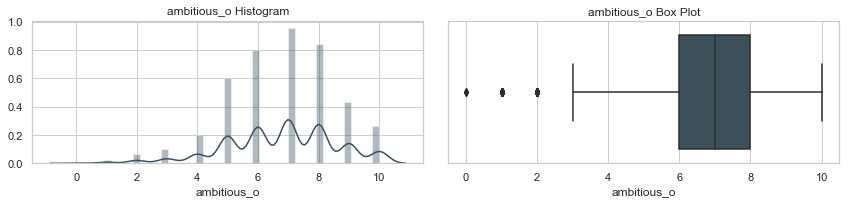

In [28]:
d, v = univariate.analysis(df[['ambitious_o']])
d

## Partner's Rating of Subject on Shared Interests

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
shared_interests_o,4661.0,700,0.0,4.0,5.487449,6.0,7.0,10.0,-2.192887,2.808754


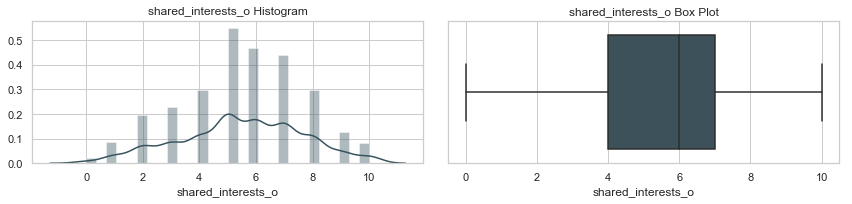

In [29]:
d, v = univariate.analysis(df[['shared_interests_o']])
d

##  Subject's Preference for Attractiveness

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
attractive_important,5311.0,50,0.0,15.0,22.546935,20.0,25.0,100.0,-10.209281,102.229414


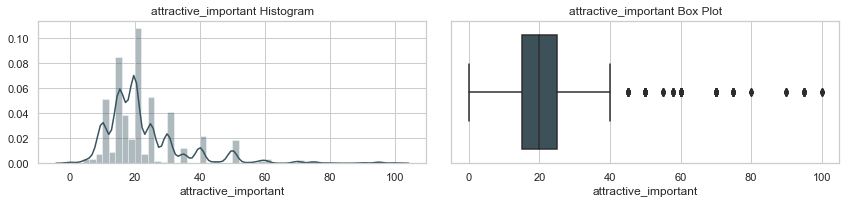

In [30]:
d, v = univariate.analysis(df[['attractive_important']])
d

##  Subject's Preference for Sincerity

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
sincere_important,5311.0,50,0.0,15.0,17.335202,18.18,20.0,60.0,-10.209281,102.229414


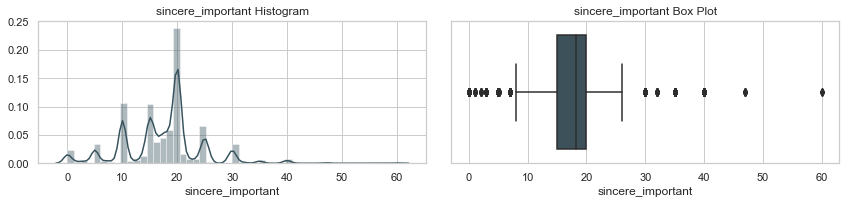

In [31]:
d, v = univariate.analysis(df[['sincere_important']])
d

##  Subject's Preference for Intelligence

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
intelligence_important,5311.0,50,0.0,17.31,20.265238,20.0,23.81,50.0,-10.209281,102.229414


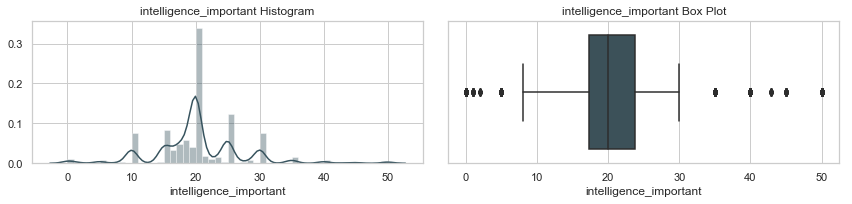

In [32]:
d, v = univariate.analysis(df[['intelligence_important']])
d

##  Subject's Preference for Humor

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
funny_important,5307.0,54,0.0,15.0,17.542958,18.0,20.0,50.0,-9.812643,94.287953


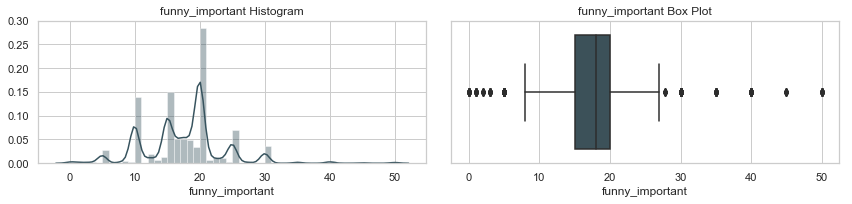

In [33]:
d, v = univariate.analysis(df[['funny_important']])
d

##  Subject's Preference for Ambition

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
ambitious_important,5300.0,61,0.0,5.0,10.673434,10.0,15.0,53.0,-9.213944,82.896755


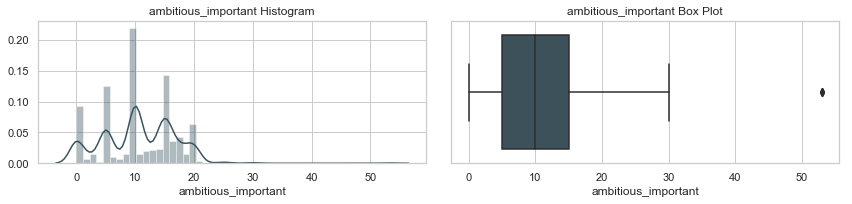

In [34]:
d, v = univariate.analysis(df[['ambitious_important']])
d

##  Subject's Preference for Shared Interests

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
shared_interests_important,5287.0,74,0.0,8.33,11.787554,10.64,16.0,30.0,-8.334263,67.459943


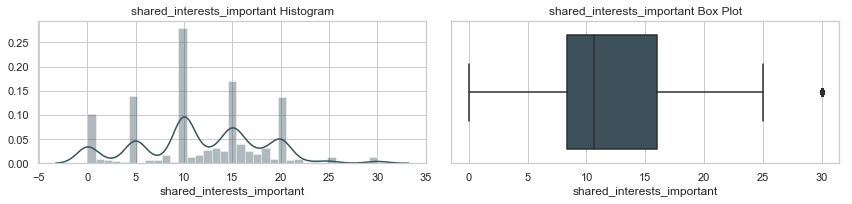

In [35]:
d, v = univariate.analysis(df[['shared_interests_important']])
d

##  Subject's Self Rating on Attractiveness

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
attractive,5292.0,69,2.0,6.0,7.091459,7.0,8.0,10.0,-8.643419,72.708691


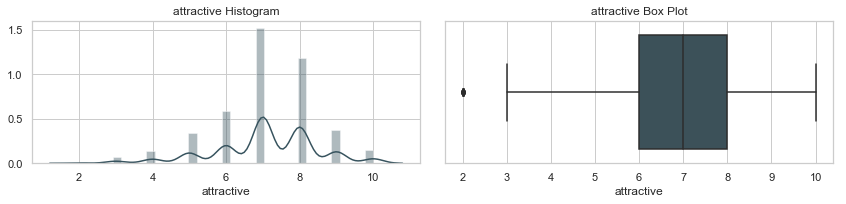

In [36]:
d, v = univariate.analysis(df[['attractive']])
d

##  Subject's Self Rating on Sincerity

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
sincere,5292.0,69,2.0,8.0,8.290627,8.0,9.0,10.0,-8.643419,72.708691


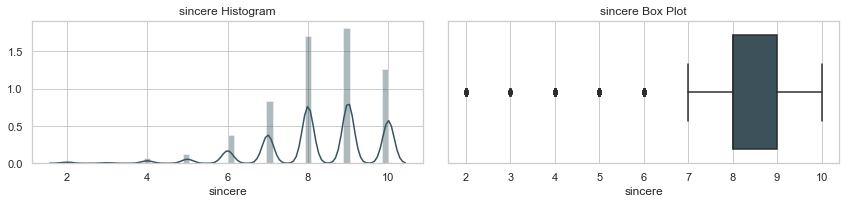

In [37]:
d, v = univariate.analysis(df[['sincere']])
d

##   Subject's Self Rating on Intelligence

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
intelligence,5292.0,69,2.0,7.0,7.730537,8.0,9.0,10.0,-8.643419,72.708691


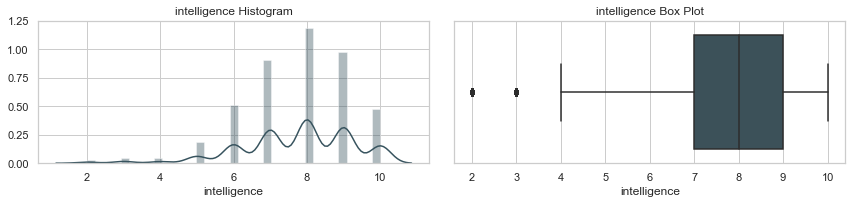

In [38]:
d, v = univariate.analysis(df[['intelligence']])
d

##  Subject's Self Rating on Humor

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
funny,5292.0,69,3.0,8.0,8.395503,8.0,9.0,10.0,-8.643419,72.708691


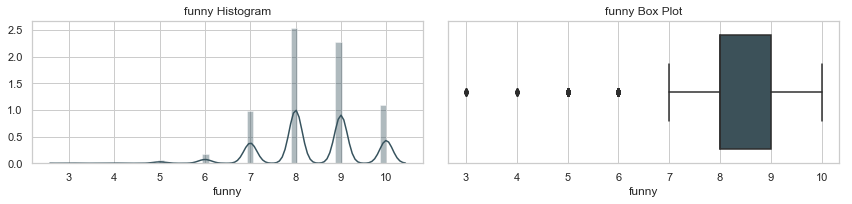

In [39]:
d, v = univariate.analysis(df[['funny']])
d

##  Subject's Self Rating on Ambition

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
ambitious,5292.0,69,2.0,7.0,7.572373,8.0,9.0,10.0,-8.643419,72.708691


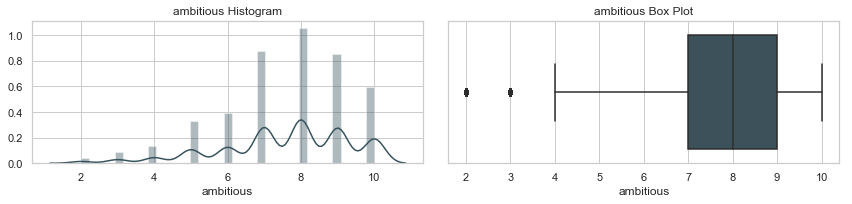

In [40]:
d, v = univariate.analysis(df[['ambitious']])
d

## Subject's Rating of Partner on Attractiveness

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
attractive_partner,5224.0,137,0.0,5.0,6.193128,6.0,8.0,10.0,-6.01312,34.157612


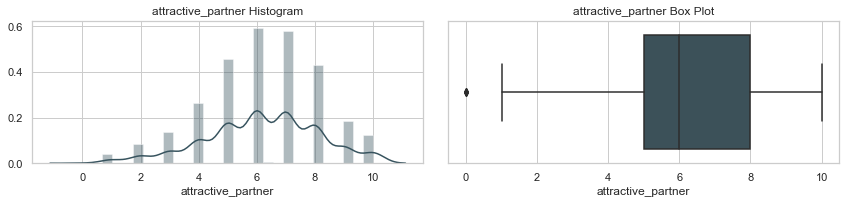

In [41]:
d, v = univariate.analysis(df[['attractive_partner']])
d

## Subject's Rating of Partner on Sincerity

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
sincere_partner,5180.0,181,0.0,6.0,7.184653,7.0,8.0,10.0,-5.162725,24.653727


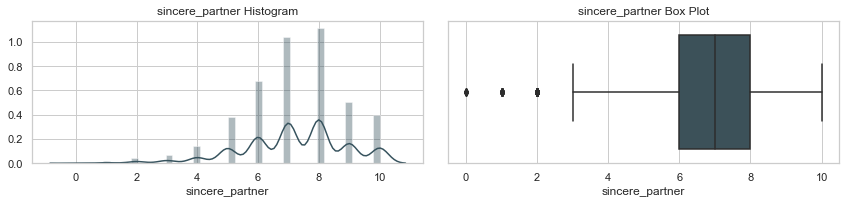

In [42]:
d, v = univariate.analysis(df[['sincere_partner']])
d

## Subject's Rating of Partner on Intelligence

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
intelligence_partner,5168.0,193,0.0,6.0,7.367744,7.0,8.0,10.0,-4.98142,22.814547


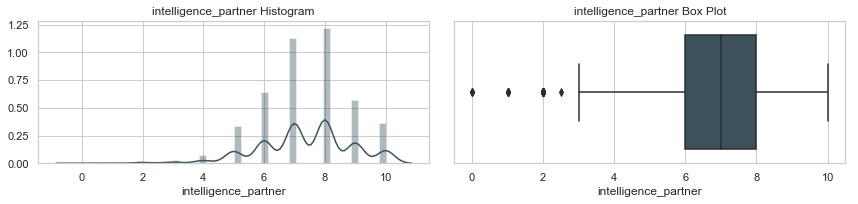

In [43]:
d, v = univariate.analysis(df[['intelligence_partner']])
d

##  Subject's Rating of Partner on Humor

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
funny_partner,5128.0,233,0.0,5.0,6.405421,7.0,8.0,10.0,-4.478172,18.054021


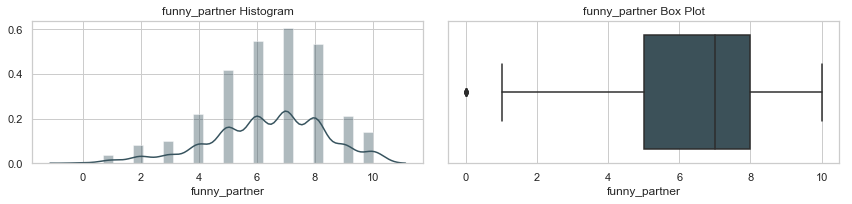

In [44]:
d, v = univariate.analysis(df[['funny_partner']])
d

## Subject's Rating of Partner on Ambition

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
ambitious_partner,4898.0,463,0.0,6.0,6.791548,7.0,8.0,10.0,-2.945057,6.673362


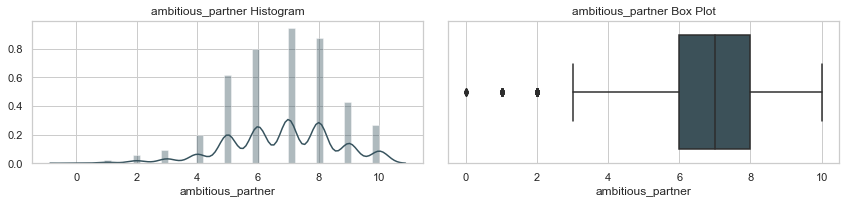

In [45]:
d, v = univariate.analysis(df[['ambitious_partner']])
d

## Subject's Rating of Partner on Shared Interests

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
shared_interests_partner,4670.0,691,0.0,4.0,5.475268,6.0,7.0,10.0,-2.215014,2.906287


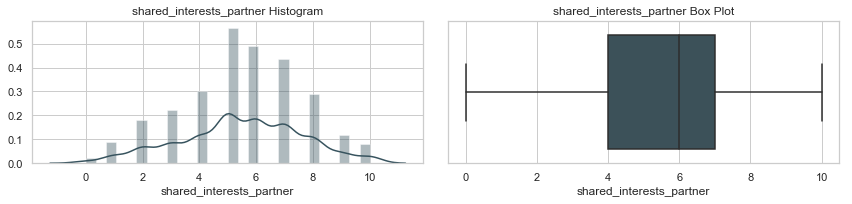

In [46]:
d, v = univariate.analysis(df[['shared_interests_partner']])
d

## Interests Correlate

,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
interests_correlate,5256.0,105,-0.83,-0.02,0.197053,0.22,0.43,0.91,-6.933767,46.07712


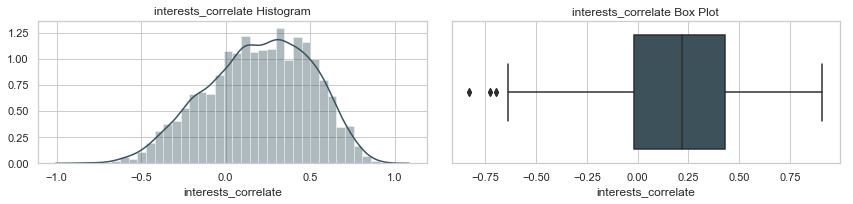

In [47]:
d, v = univariate.analysis(df[['interests_correlate']])
d

## Match

,Not Matched,Matched,missing
match,4455,906,0


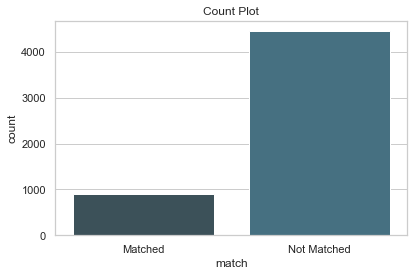

In [48]:
d, v = univariate.analysis(df[['match']])
d